<a href="https://colab.research.google.com/github/ashhyyyy-vis/sEMG_ML/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls -lh /content/drive/MyDrive/Synapse/Synapse_Dataset.zip

-rw------- 1 root root 467M Jan 10 02:08 /content/drive/MyDrive/Synapse/Synapse_Dataset.zip


In [ ]:
!unzip /content/drive/MyDrive/Synapse/Synapse_Dataset.zip


Archive:  /content/drive/MyDrive/Synapse/Synapse_Dataset.zip
replace Synapse_Dataset/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
frames=[]
strr=["Synapse_Dataset/Session1/session1_subject_1/gesture00_trial01.csv",
      "Synapse_Dataset/Session1/session1_subject_5/gesture01_trial01.csv",
      "Synapse_Dataset/Session2/session2_subject_10/gesture02_trial03.csv",
      "Synapse_Dataset/Session2/session2_subject_15/gesture03_trial06.csv",
      "Synapse_Dataset/Session3/session3_subject_18/gesture04_trial02.csv"
      ]
for i in strr:
  ref = pd.read_csv(i)
  frames.append(ref)

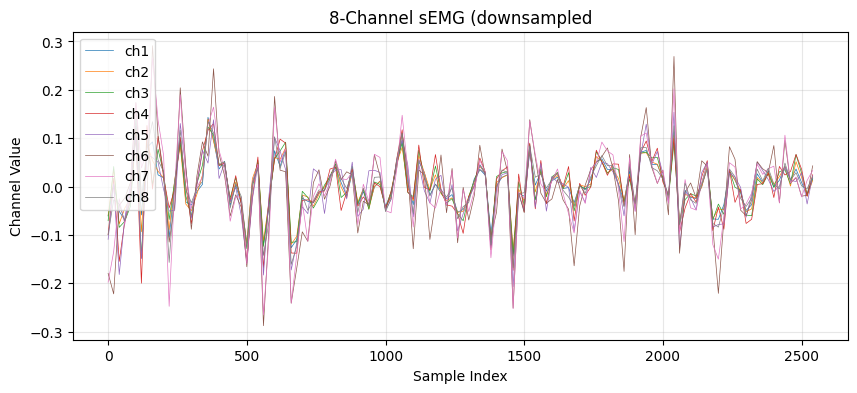

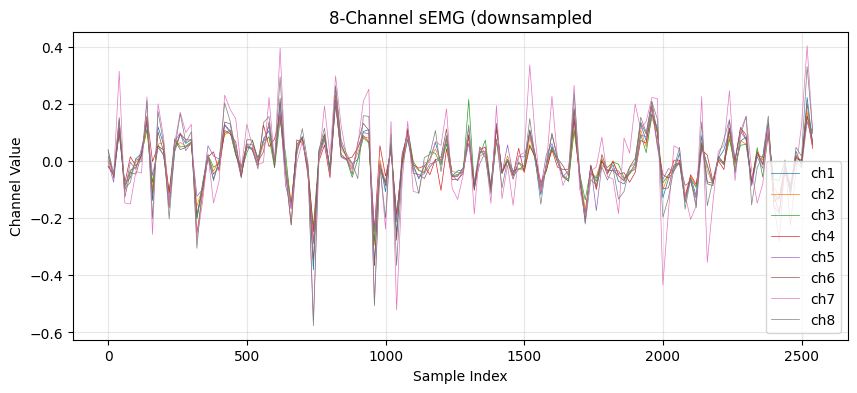

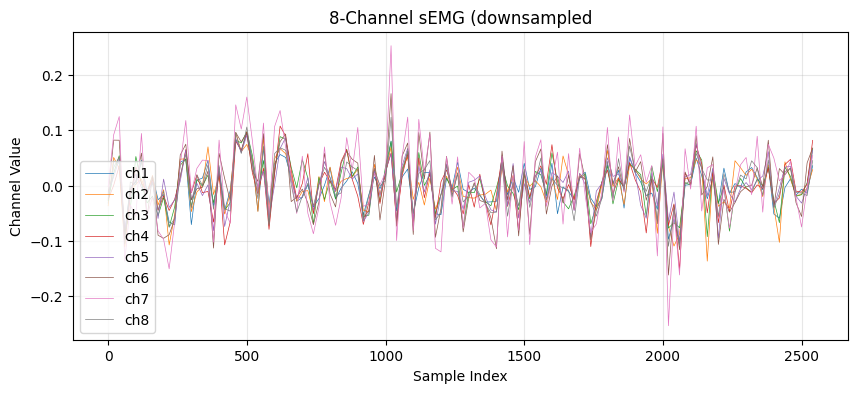

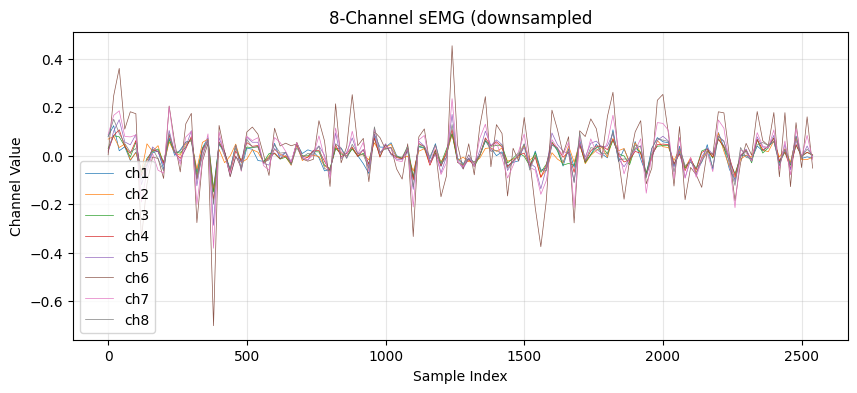

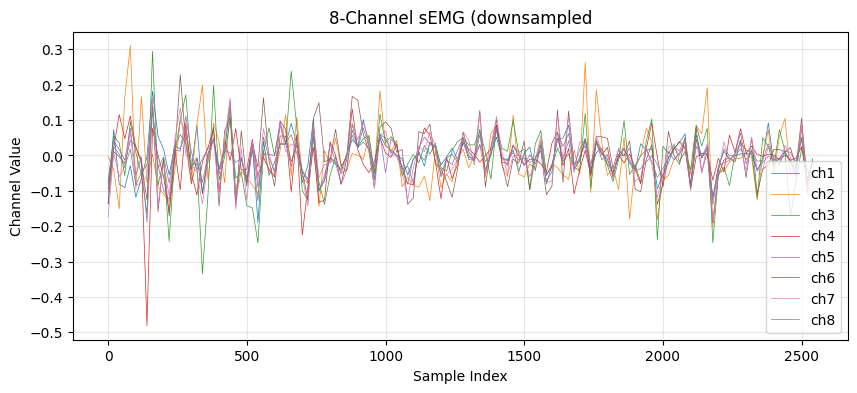

In [ ]:
ds_factor = 20
for df in frames:
  fr = df.iloc[::ds_factor]
  fs=512
  #time_ds = np.arange(len(fr)) * (ds_factor / fs)
  plt.figure(figsize=(10,4))
  for ch in range(8):
    k="ch"+str(ch+1)
    plt.plot(fr[k], label=f"ch{ch+1}" ,linewidth=0.5)
  plt.xlabel("Sample Index")
  plt.ylabel("Channel Value")
  plt.title("8-Channel sEMG (downsampled")
  plt.legend()
  plt.grid(True, alpha=0.3)
  plt.show()

In [ ]:
window_size=100
step_size=50

rms=[]
for df in frames:
  queen=[]
  for i in range(8):
    rms_temp=[]
    k="ch"+str(i+1)
    for j in range(0,len(df)-window_size+1,step_size):
      window=df[k][j:j+window_size]
      rms_window=(np.sqrt(np.mean(window**2))).item()
      rms_temp.append(rms_window)
    queen.append(rms_temp)
  rms.append(queen)


In [ ]:
count1=0
count2=0
for k in rms:
  count1=0
  for i in queen:
    count1+=1
    raw = abs(frames[count2][f'ch{count1}'].values)
    time_raw = np.arange(len(raw)) / fs
    rms_ch1 = i

    rms_time = [
        (i * step_size + window_size / 2) / fs
        for i in range(len(rms_ch1))
    ]

    # ---- PLOTTING ----
    plt.figure(figsize=(10, 4))

    plt.plot(time_raw, raw, linewidth=0.4, label="Raw EMG (Ch1)")
    plt.plot(rms_time, rms_ch1, linewidth=2, label="RMS Envelope")

    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(f"Raw vs RMS – Channel {count1}, gesture{count2}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
  count2+=1

In [ ]:
rms_avg=[]
for trial in rms:
    mean_rms = []
    for channel_rms in trial:
        mean_rms.append(np.mean(channel_rms).item())
    rms_avg.append(mean_rms)
rms_avg

In [ ]:
channels = np.arange(1, 9)

plt.figure(figsize=(8, 4))
plt.bar(channels, rms_avg[0])
plt.xlabel("Channel")
plt.ylabel("Mean RMS")
plt.title("Gesture signature – Trial 1")
plt.xticks(channels)
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(channels - 0.2, rms_avg[0], width=0.4, label="Gesture A")
plt.bar(channels + 0.2, rms_avg[1], width=0.4, label="Gesture B")

plt.xlabel("Channel")
plt.ylabel("Mean RMS")
plt.title("Gesture comparison")
plt.xticks(channels)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
channels = np.arange(1, 9)
num_gestures = len(rms_avg)

bar_width = 0.8 / num_gestures   # total width shared by gestures

plt.figure(figsize=(20, 4))

for g in range(num_gestures):
    offset = (g - num_gestures/2) * bar_width
    plt.bar(
        channels + offset,
        rms_avg[g],
        width=bar_width,
        label=f"Gesture {g}"
    )

plt.xlabel("Channel")
plt.ylabel("Mean RMS")
plt.title("Gesture comparison (Mean RMS per channel)")
plt.xticks(channels)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
#Creating rms vectors
window_size = 100
step_size = 50
rows = []
for session in range(1, 4):
    for subject in range(1, 26):
        for gesture in range(0, 5):
            for trial in range(1, 8):

                filepath = (
                    f"/content/Synapse_Dataset/Session{session}/"
                    f"session{session}_subject_{subject}/"
                    f"gesture0{gesture}_trial0{trial}.csv"
                )

                df = pd.read_csv(filepath)
                feature_vector = []

                for ch in range(8):
                    signal = df[f"ch{ch+1}"].values
                    rms_vals = []

                    for start in range(0, len(signal) - window_size + 1, step_size):
                        window = signal[start:start+window_size]
                        rms_vals.append(np.sqrt(np.mean(window**2)))

                    feature_vector.append(np.mean(rms_vals))

                rows.append([
                    session,
                    subject,
                    gesture,
                    trial,
                    *feature_vector
                ])

# Create final DataFrame
columns = (
    ["session", "subject", "gesture", "trial"] +
    [f"ch{i+1}_rms" for i in range(8)]
)

features_df = pd.DataFrame(rows, columns=columns)


In [ ]:
features_df.to_csv(
    "/content/Synapse_Dataset/emg_features_rms.csv",
    index=False
)

In [87]:
#Creating MAV vectors
window_size = 100
step_size = 50
rows = []
for session in range(1, 4):
    for subject in range(1, 26):
        for gesture in range(0, 5):
            for trial in range(1, 8):

                filepath = (
                    f"/content/Synapse_Dataset/Session{session}/"
                    f"session{session}_subject_{subject}/"
                    f"gesture0{gesture}_trial0{trial}.csv"
                )

                df = pd.read_csv(filepath)
                feature_vector_2 = []

                for ch in range(8):
                    signal = df[f"ch{ch+1}"].values
                    mav_vals = []
                    for start in range(0, len(signal) - window_size + 1, step_size):
                        window = signal[start:start+window_size]
                        mav_vals.append((np.mean(np.abs(window))))
                    feature_vector_2.append(np.mean(mav_vals))
                rows.append(feature_vector_2)
len(rows)
# Create final DataFrame
mav_df = pd.DataFrame(
    rows,
    columns=[f"ch{i+1}_mav" for i in range(8)]
)
features_df = pd.read_csv("/content/Synapse_Dataset/emg_features_rms.csv")
features_df = pd.concat([features_df, mav_df], axis=1)
features_df.to_csv(
    "/content/Synapse_Dataset/emg_features_rms_mav.csv",
    index=False
)


In [3]:
#Creating MAV vectors
window_size = 100
step_size = 50
rows = []
for session in range(1, 4):
    for subject in range(1, 26):
        for gesture in range(0, 5):
            for trial in range(1, 8):

                filepath = (
                    f"/content/Synapse_Dataset/Session{session}/"
                    f"session{session}_subject_{subject}/"
                    f"gesture0{gesture}_trial0{trial}.csv"
                )

                df = pd.read_csv(filepath)
                feature_vector_3 = []

                for ch in range(8):
                    signal = df[f"ch{ch+1}"].values
                    wl_vals = []
                    for start in range(0, len(signal) - window_size + 1, step_size):
                        window = signal[start:start+window_size]
                        temp_sum=0
                        for i in range(len(window)-1):
                          #print('Protect the Dolls')
                          temp_sum+=np.abs(window[i]-window[i+1])
                        wl_vals.append(temp_sum.item())
                    feature_vector_3.append(np.mean(wl_vals))
                rows.append(feature_vector_3)
len(rows)
# Create final DataFrame
wl_df = pd.DataFrame(
    rows,
    columns=[f"ch{i+1}_wl" for i in range(8)]
)
features_df = pd.read_csv("/content/Synapse_Dataset/emg_features_rms_mav.csv")
features_df = pd.concat([features_df, wl_df], axis=1)
features_df.to_csv(
    "/content/Synapse_Dataset/emg_features_rms_mav_wl.csv",
    index=False
)
